**IMPORTS**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**LOADING DATA**

In [6]:
df = pd.read_csv("D:\INTERNSHIP\Iris.csv")

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**DATA EXPLORATION**

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
print("unique number of values in dataset species:",df["Species"].nunique())
print("unique species in iris dataset:",df["Species"].unique())

unique number of values in dataset species: 3
unique species in iris dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


**EXPLORATORY DATA ANALYSIS**

**Data Visualization**

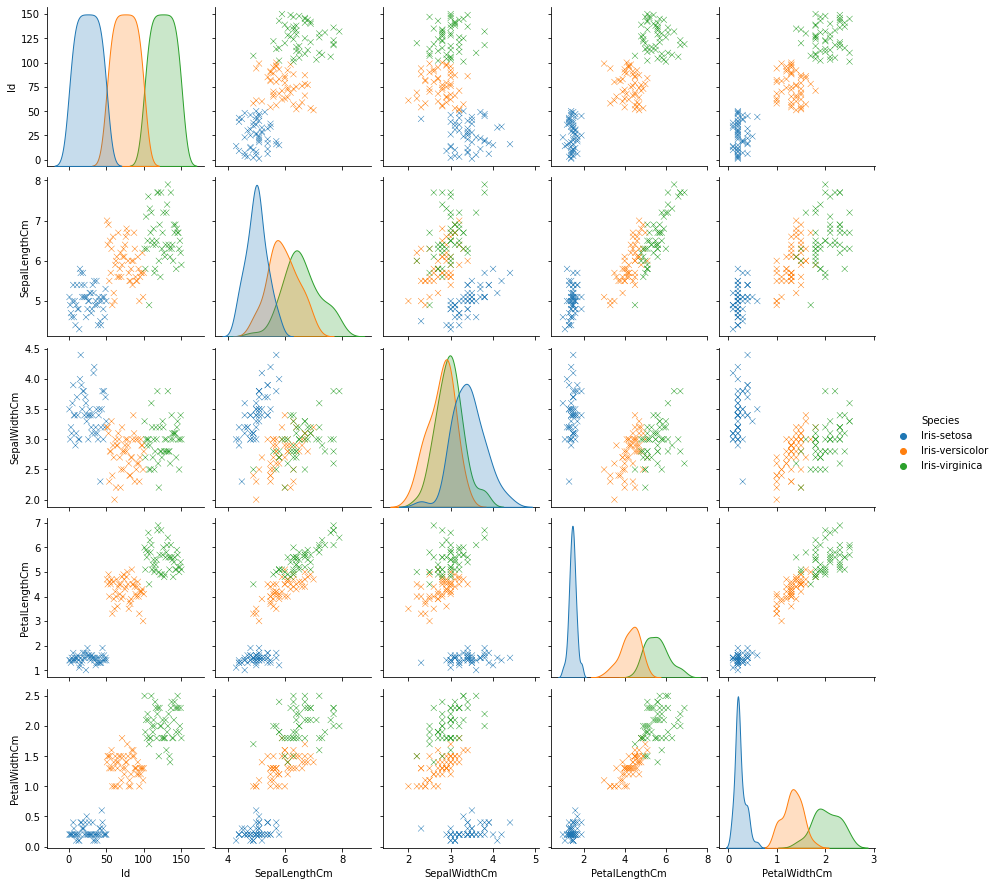

In [15]:
sns.pairplot(df,hue='Species',markers="x")
plt.show()

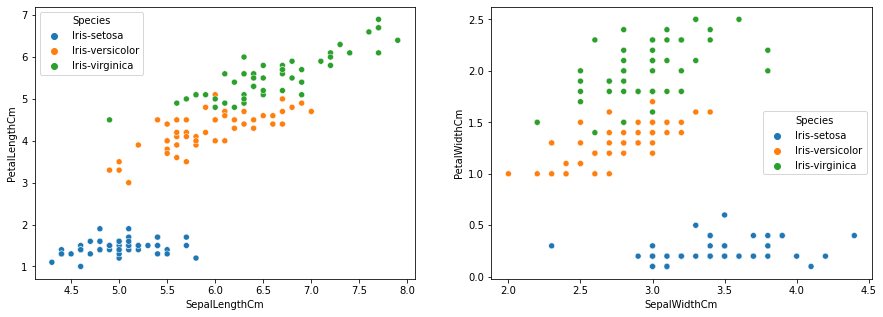

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=df,hue='Species')

plt.subplot(1,2,2)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=df,hue='Species')

plt.show()

In [17]:
df.corr()# check correlations in data 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


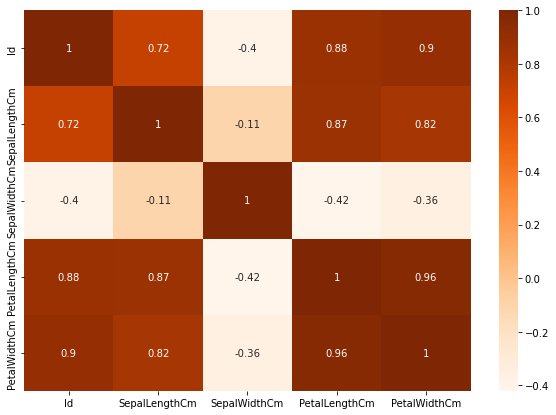

In [23]:
# Use heatmap to see correlations in data
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot= True,cmap="Oranges")
plt.show()

**In the above heatmap we can see petal length and petal widht are highly correlated**

**DATA CLEANSING**

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [27]:
df['Species'].unique()

array([0, 1, 2])

In [11]:
x=df.iloc[:,[0,1,2,3]]
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [8]:
y=df.iloc[:,-1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [12]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


**Supervised Machine Learning**

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


**LOGISTIC REGRESSION**

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Logistic Regression applied successfully implemented")
y_pred = lr.predict(x_test)

Logistic Regression applied successfully implemented


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [59]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:",accuracy*100)

accuracy is: 100.0


In [60]:
print("classification Report")
print(classification_report(y_test,y_pred))

classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**RANDOM FOREST CLASSIFIER**

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
print("Random Forest Classifier is successfully implemented")
y_pred = rfc.predict(x_test)

Random Forest Classifier is successfully implemented


In [66]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [67]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy*100)

accuracy 100.0


In [69]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**DECISION TREE**

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(x_train,y_train)
print("Decision Tree Classifier is successfully implemented")
y_pred=dtree.predict(x_test)

Decision Tree Classifier is successfully implemented


In [80]:
print("Confusion Matrix")
cm=confusion_matrix(y_test,y_pred)
cm

Confusion Matrix


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]], dtype=int64)

In [81]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 96.66666666666667


In [84]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [87]:
from sklearn.tree import plot_tree
#For Visualization of Decison Tree
feature=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
classes=['Iris-setosa', 'Iris-versicolor' ,'Iris-virginica']

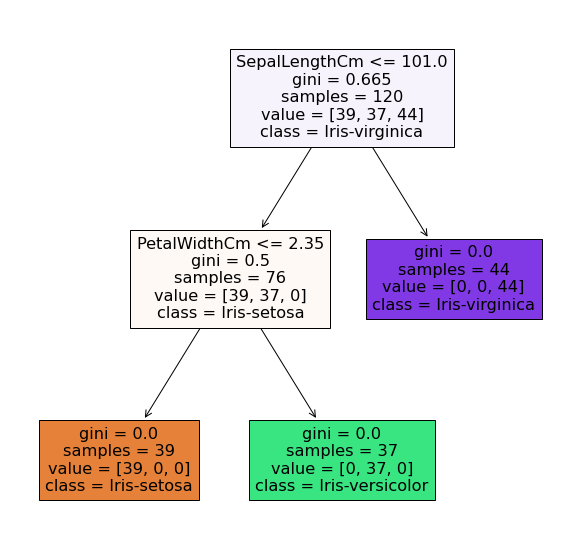

In [90]:
plt.figure(figsize=(10,10))
plot_tree(dtree,feature_names=feature,class_names=classes,filled=True);

**SUPPORT VECTOR MACHINE**

In [96]:
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train,y_train)
print("SVC is implemented successfully")
y_pred=svc.predict(x_test)

SVC is implemented successfully


In [97]:
print("Confusion Matrix")
cm=confusion_matrix(y_test,y_pred)
cm

Confusion Matrix


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [98]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy*100)

Accuracy 100.0


In [99]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**K NEAREST NEIGHBORS**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
print("The KNeighborsClassifier is successfully implemented")
y_pred=knn.predict(x_test)

The KNeighborsClassifier is successfully implemented


In [104]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [105]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 100.0


In [106]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**NAIVE BAYES CLASSIFIER**

In [110]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(x_train,y_train)
print("Naive Bayes is successfully implemented")
y_pred = gnb.predict(x_test)

Naive Bayes is successfully implemented


In [111]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [112]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy*100)

Accuracy: 100.0


In [26]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



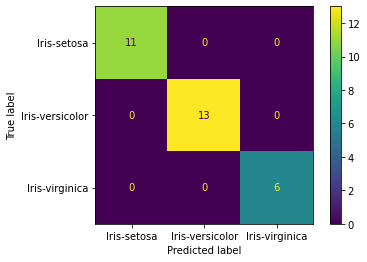

In [125]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
disp.plot()
plt.show()

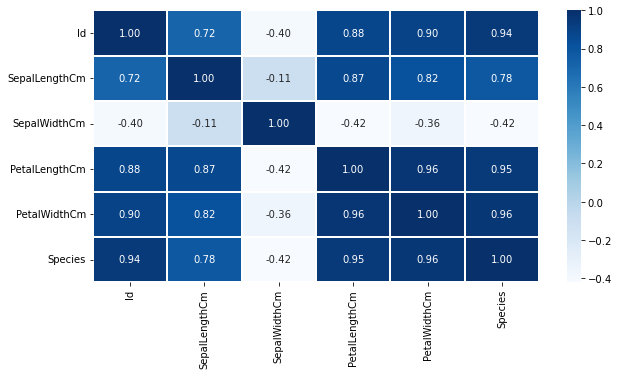

In [128]:
plt.figure(figsize=(10,5))
corr_target= df.drop("Species", axis=1)
sns.heatmap(df.corr(),annot=True,cmap='Blues',fmt='.2f',linewidths=2)
plt.show()

In [17]:
X=df.drop(['SepalLengthCm','SepalWidthCm','Id','Species'],axis=1)
X

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


**K MEANS**

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


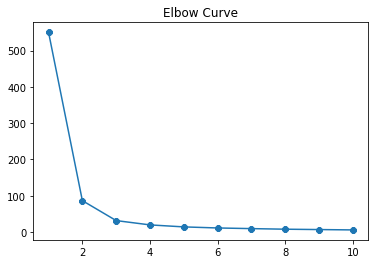

In [20]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker="8")
plt.title('Elbow Curve')
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,n_init=10)
label=kmeans.fit_predict(X)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1]


In [22]:
print(kmeans.cluster_centers_)


[[1.464      0.244     ]
 [5.59583333 2.0375    ]
 [4.26923077 1.34230769]]


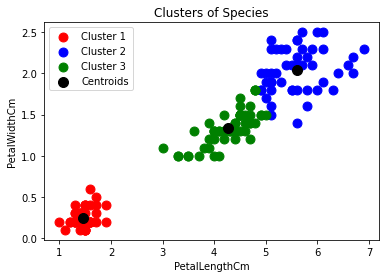

In [23]:
plt.scatter(X.loc[label == 0, 'PetalLengthCm'], X.loc[label == 0,
'PetalWidthCm'], s=80, c='red', label='Cluster 1')
plt.scatter(X.loc[label == 1, 'PetalLengthCm'], X.loc[label == 1,
'PetalWidthCm'], s=80, c='blue', label='Cluster 2')
plt.scatter(X.loc[label == 2, 'PetalLengthCm'], X.loc[label == 2,
'PetalWidthCm'], s=80, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,
1], s=100, c='black', label='Centroids')
plt.title('Clusters of Species')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

**Accuracy of Logistic Regression = 100%**

**Accuracy of Random Forest Classifier = 100%**

**Accuracy of Decision Tree = 96.66%**

**Accuracy of KNeighbors Classifier = 100%**

**Accuracy of Support Vector Machine = 100%**

**Accuracy of Naive Bayes = 100%**

**TEST MODEL**

In [162]:
input_data=(4.9,3.0,1.4,0.2)
#changing the input data to a numpy array
input_data_as_nparray=np.asarray(input_data)

#reshape the data as we are predicting the label for only the instance
input_data_reshaped=input_data_as_nparray.reshape(1,-1)
prediction=dtree.predict(input_data_reshaped)

print("The category is:",prediction)

The category is: [0]
